# Análise exploratória de dados do dataset "FIFA21_official_data"

O objetivo dessa análise exploratória de dados é ler o dataset, processar os tipos de variáveis e checar alguns resultados.

In [1]:
# Pacotes necessários ao análise.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Lendo e visualizando as primeiras linhas do dataset.
df = pd.read_csv('FIFA21_official_data.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,€64.6M,57.0
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€161M,68.0
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,49.0,14.0,8.0,14.0,13.0,14.0,ST,87.0,€103.5M,59.0
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,...,79.0,8.0,14.0,13.0,13.0,14.0,LB,83.0,€46.2M,79.0


Código para checar os nomes, tipos de dados, se contém valores nulos de todas as colunas e o tamanho do dataset. 


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17108 non-null  int64  
 1   Name                      17108 non-null  object 
 2   Age                       17108 non-null  int64  
 3   Photo                     17108 non-null  object 
 4   Nationality               17108 non-null  object 
 5   Flag                      17108 non-null  object 
 6   Overall                   17108 non-null  int64  
 7   Potential                 17108 non-null  int64  
 8   Club                      16783 non-null  object 
 9   Club Logo                 17108 non-null  object 
 10  Value                     17108 non-null  object 
 11  Wage                      17108 non-null  object 
 12  Special                   17108 non-null  int64  
 13  Preferred Foot            17108 non-null  object 
 14  Intern

Removemos do dataset as colunas 'ID', 'Photo', 'Flag', 'Club Logo', 'Real Face'; pois não trazem informações úteis.

In [4]:
df = df.drop(columns=['ID',
                      'Photo',
                      'Flag',
                      'Club Logo',
                      'Real Face', ])

Temos as colunas 'Wage', 'Value', 'Release_Clause' que a informações principal é um valor em dinheiro, mas que estão como strings, vamos transformar para float.

Olhando os dados, vemos que alguns valores estão em milhares de euros e outros, estão em unidades de euro. Vamos mudar todos os valores para milhares de euros. E transformar o tipo de dado para float.

In [5]:
# Tira o primeiro caracterer, '€', de cada item da tabela.
df['Wage'] = df.Wage.replace('€', '',regex=True)

In [6]:
# Transformar os valores em unidades de euro para milhares de euro.
df['Wage'] = [float(wage)/1000 if wage[-1]!='K' else wage for wage in df['Wage']]

In [7]:
# Tira o último caracterer, 'K', de cada item da tabela.
df['Wage'] = df.Wage.replace('K', '',regex=True).astype(float)

In [8]:
df['Wage']

0        115.0
1        370.0
2        195.0
3        290.0
4         41.0
         ...  
17103      0.5
17104      0.5
17105      0.5
17106      0.5
17107      0.5
Name: Wage, Length: 17108, dtype: float64

Na coluna 'Value', existem valores em milhões de euros e em milhares de euros. Vamos colocar todos na mesma escala e transformar o tipo de dado para float.

In [9]:
df['Value']

0        €31.5M
1          €87M
2          €63M
3        €50.5M
4          €22M
          ...  
17103      €50K
17104      €50K
17105      €60K
17106      €50K
17107      €50K
Name: Value, Length: 17108, dtype: object

In [10]:
# Tira o primeiro caracterer, '€', de cada item da tabela.
df['Value'] = df.Value.replace('€','',regex=True)

In [11]:
# Transformar os valores de milhares de euros para milhões de euros.
df['Value'] = [float(value[:-1])/1000 if value[-1]=='K' else value for value in df['Value']]

In [12]:
# Tira o útimo caractere, 'M', dos items da tabela que estavam em milhões de euro e transformar para float.
df['Value'] = df.Value.replace('M','',regex=True).astype(float)

In [13]:
df['Value']

0        31.50
1        87.00
2        63.00
3        50.50
4        22.00
         ...  
17103     0.05
17104     0.05
17105     0.06
17106     0.05
17107     0.05
Name: Value, Length: 17108, dtype: float64

Com a coluna 'Release Clause' que representa o valor de quebra de contrato temos a mesma situação anterior, entretanto temos também valores do tipo 'nan'. Note que se um jogador não tem clausula de quebra de contrato, então podemos preencher com o valor 0.

In [14]:
df['Release Clause']

0         €64.6M
1          €161M
2        €124.4M
3        €103.5M
4         €46.2M
          ...   
17103      €120K
17104       €83K
17105      €149K
17106       €94K
17107      €109K
Name: Release Clause, Length: 17108, dtype: object

In [15]:
# Aqui renomearemos a nossa coluna para não ficar o espaço vazio.
df.rename(columns={'Release Clause': 'Release_Clause'}, inplace = True)

In [16]:
# Se o valor de um item na coluna 'Release Clause', preencher com valores 0.
df['Release_Clause'] = ['0' if pd.isna(clause) else clause for clause in df['Release_Clause']]

In [17]:
# Tira o primeiro caracterer, '€', de cada item da tabela.
df['Release_Clause'] = df.Release_Clause.replace('€','', regex=True)

In [18]:
# Transformar os valores em milhares de euros para valores em milhões de euros.
df['Release_Clause'] = [ (float(clause[0:-1])/1000) if clause[-1] == 'K' else clause for clause in df['Release_Clause']]

In [19]:
df['Release_Clause'] = df.Release_Clause.replace('M','', regex=True).astype(float)

In [20]:
df['Release_Clause']

0         64.600
1        161.000
2        124.400
3        103.500
4         46.200
          ...   
17103      0.120
17104      0.083
17105      0.149
17106      0.094
17107      0.109
Name: Release_Clause, Length: 17108, dtype: float64

Como pode ser visto a seguir, a coluna 'Height', possui informações de alturas medidas em pés e polegadas. Vamos transformar essa informação para metros através da função trans_height(height) e mudar o tipo de objeto para float. 

In [21]:
df['Height']

0         6'0
1        5'11
2        5'10
3         5'9
4         5'8
         ... 
17103     6'4
17104     6'5
17105     6'3
17106     6'1
17107     6'0
Name: Height, Length: 17108, dtype: object

In [22]:
# Função que transforma a altura de polegadas e pés para metros.
def trans_height(height):
    b = int(height.split("'")[0])
    c = int(height.split("'")[1])
    total = b*12 + c
    metros = total * 0.0254
    metros = round(metros,2)
    return metros

In [23]:
# Aplicamos a função para cada item da coluna 'Height'
df['Height'] = [trans_height(height) for height in df['Height']]

In [24]:
df['Height'] 

0        1.83
1        1.80
2        1.78
3        1.75
4        1.73
         ... 
17103    1.93
17104    1.96
17105    1.91
17106    1.85
17107    1.83
Name: Height, Length: 17108, dtype: float64

Da mesma forma que anteriormente, a coluna 'Weight' possui os valores em libras e objetos do tipo string. Vamos transformar os valores para quilograma e o tipo do objeto para int, através da função 'trans_Weight(weight)'.

In [25]:
df['Weight']

0        190lbs
1        154lbs
2        152lbs
3        161lbs
4        152lbs
          ...  
17103    176lbs
17104    187lbs
17105    176lbs
17106    168lbs
17107    172lbs
Name: Weight, Length: 17108, dtype: object

In [26]:
# Função que transforma libras para quilogramas.
def trans_Weight(weight):
    weight = int(weight[0:-3])
    weight = 0.453592*weight
    return round(weight)

In [27]:
# Aplicamos a função para cada valor da coluna 'Weight'.
df['Weight'] = [trans_Weight(weight) for weight in df['Weight']]

In [28]:
df['Weight']

0        86
1        70
2        69
3        73
4        69
         ..
17103    80
17104    85
17105    80
17106    76
17107    78
Name: Weight, Length: 17108, dtype: int64

Os dados da coluna 'Position', estão bugados no dataset. Entretanto após olhar os valores vemos que as informações estão contida nas duas ou três letras finais de cada item da tabela. Assim vamos eliminar o resto e deixar o valor que queremos. Por exemplo, o primeiro valor '< span class="pos pos24">RS' será transformado em 'RS' e o segundo valor '< span class="pos pos13">RCM', transformado em 'RCM'.

In [29]:
df['Position']

0         <span class="pos pos24">RS
1        <span class="pos pos13">RCM
2        <span class="pos pos18">CAM
3         <span class="pos pos23">RW
4          <span class="pos pos7">LB
                    ...             
17103    <span class="pos pos29">RES
17104    <span class="pos pos29">RES
17105    <span class="pos pos29">RES
17106    <span class="pos pos28">SUB
17107    <span class="pos pos29">RES
Name: Position, Length: 17108, dtype: object

In [30]:
# Precisamos atribuir a palavra 'nan' onde não temos valores para conseguirmos rodar o próximo loop.
df['Position'] = ['nan' if pd.isna(position) else position for position in df['Position']]

In [31]:
# Pegamos as três ultimas letras de cada item da tabela 'Position'.
df['Position'] = [position[-3:] for position in df['Position']]

In [32]:
# Caso o item que queremos tenha apenas duas letras, igual o primeiro exemplo, a antepenúltima letra será '<', que
# será removida.
df['Position'] = df.Position.replace('>','',regex=True)

In [33]:
df['Position']

0         RS
1        RCM
2        CAM
3         RW
4         LB
        ... 
17103    RES
17104    RES
17105    RES
17106    SUB
17107    RES
Name: Position, Length: 17108, dtype: object

Na coluna 'Joined' e 'Contract Valid Until', temos informações de datas mas o valor de cada item é uma string. A data está no formato Mês dia, Ano; sendo que o Mês está abreviado com as três primeiras letras.  Vamos transformar cada item das tabelas para um objeto datetime no formato Ano-Mês-dia. 

In [34]:
df['Joined']

0        Sep 25, 2020
1        Aug 30, 2015
2        Jan 30, 2020
3        Jul 12, 2019
4        Sep 14, 2020
             ...     
17103     Mar 2, 2018
17104     Jul 1, 2019
17105     Jul 1, 2019
17106    Mar 31, 2019
17107     Jul 1, 2018
Name: Joined, Length: 17108, dtype: object

Inicialmente transformaremos o valor do mês, para um valor numérico. Faremos isso utilizando o dicionário 'dic_mm' e a list compreension abaixo.

In [35]:
dic_mm = {'Jan':'1', 'Feb':'2', 'Mar':'3','Apr':'4','May':'5', 'Jun': '6', 'Jul':'7', 'Aug':'8','Sep':'9','Oct':'10','Nov':'11','Dec':'12' }
df['Joined'] = [dic_mm[join[:3]]+ join[3:] if pd.isna(join)==False else join for join in df['Joined']]

In [36]:
# Substituímos os espaços vazios ' ', por '/'. 
df['Joined'] = df.Joined.replace(' ', '/', regex=True)

In [37]:
# Em seguida, removemos ',' de cada item da coluna 'Joined'.
df['Joined'] = df.Joined.replace(',', '', regex=True)

In [38]:
# Por fim, mudamos o tipo de data de string para datetime. 
df['Joined'] = [join if pd.isna(join) else pd.to_datetime(join) for join in df['Joined']]

In [39]:
df['Joined']

0       2020-09-25
1       2015-08-30
2       2020-01-30
3       2019-07-12
4       2020-09-14
           ...    
17103   2018-03-02
17104   2019-07-01
17105   2019-07-01
17106   2019-03-31
17107   2018-07-01
Name: Joined, Length: 17108, dtype: datetime64[ns]

Analogamente transformamos cada item cada coluna 'Contract Valid Until' de string para datetime. Como o formato da data é apenas Anos, basta aplica a função 'pd.to_datime'.

In [40]:
df['Contract Valid Until']

0        2022
1        2023
2        2025
3        2024
4        2024
         ... 
17103    2021
17104    2022
17105    2021
17106    2022
17107    2020
Name: Contract Valid Until, Length: 17108, dtype: object

In [41]:
# Transformar o tipo do objeto de string para datetime.
df['Contract Valid Until'] = [until if pd.isna(until) else pd.to_datetime(until) for until in df['Contract Valid Until']]

In [42]:
df['Contract Valid Until']

0       2022-01-01
1       2023-01-01
2       2025-01-01
3       2024-01-01
4       2024-01-01
           ...    
17103   2021-01-01
17104   2022-01-01
17105   2021-01-01
17106   2022-01-01
17107   2020-01-01
Name: Contract Valid Until, Length: 17108, dtype: datetime64[ns]

# Obtendo informações do dataset. 

Nessa segunda parte da análise, iremos obter algumas informações simples sobre o dataset.

A primeira coisa que queremos saber é a média do Overall dos jogadores por time. O Overall indica o quanto um jogador é bom. Assim, quanto melhor o jogador maior o Overall. É esperado que o melhor time tenha a melhor média de Overall. 

In [43]:
# Criamos um novo dataset com as colunas 'Club' e 'Overall'.
club_over = df.filter(['Club', 'Overall'])

In [44]:
j=0
dic_club_over = {}
for i in club_over['Club']:
    try:
        if i in dic_club_over:
            dic_club_over[i].append(club_over['Overall'][j])
            j+=1
        else:
            dic_club_over[i] = [club_over['Overall'][j]]
            j+=1
    except:
        j+=1
        pass

dic_club_over = {i: np.mean(dic_club_over[i]) for i in dic_club_over}

lista_club_mean_sort = [(i,dic_club_over[i]) for i in dic_club_over]
club_mean_sort = pd.DataFrame(lista_club_mean_sort, columns=['Club','Overall']).sort_values(by='Overall')


In [45]:
club_mean_sort

,Club,Overall
837,Bray Wanderers,48.500000
830,Cesena,49.000000
839,Halmstads BK,51.000000
833,Al Batin,52.000000
813,Finn Harps,52.111111
...,...,...
11,Real Madrid,78.968750
19,FC Anzhi Makhachkala,79.000000
810,Siena,79.000000
8,FC Bayern München,81.461538


Note que temos um time chamado '111648' como o time com a maior média de overall por jogador. Após pesquisa na internet chegamos a conclusão que é um time fictício criado para armazenar jogadores fictícios o código abaixo confirma que só temos 3 jogadores no time. Assim, retiraremos essa linha do dataset. 

In [46]:
j=0
for i in df['Club']:
    if i=='111648':
        print(df['Name'][j])
    j+=1

 09 H. de Noteboom
 09 B. Ronhaar
 09 J. Maatje


In [47]:
# Remover o time '111648'
club_mean_sort = club_mean_sort[club_mean_sort.Club != '111648']

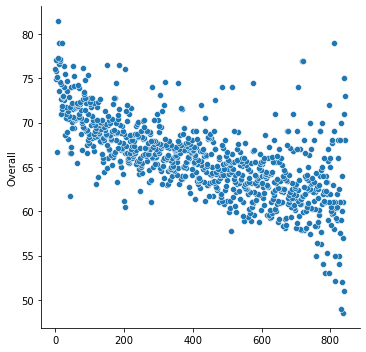

In [48]:
sns.relplot(data=club_mean_sort.Overall)

<AxesSubplot:xlabel='Overall', ylabel='Club'>

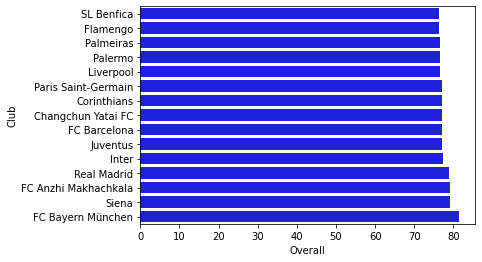

In [49]:
sns.set_color_codes("pastel")
sns.barplot(x="Overall", y="Club", data=club_mean_sort[-15:],
            label="Value em €", color="blue")

Assim, vemos que o time com a melhor média é o FC Bayern München, ganhador da champions 2019/2020. 

Agora, iremos analisar o valor de um time com base no valor dos jogadores deste time.

In [50]:
# Criamos um dataframe com as colunas 'Club' e 'Value'.
club_value = df.filter(['Club', 'Value'])

In [51]:
j=0
dic = {}
for i in club_value['Club']:
    try:
        if i in dic:
            dic[i].append(club_value['Value'][j])
            j+=1
        else:
            dic[i] = [club_value['Value'][j]]
            j+=1
    except:
        j+=1
        pass

dic = {i: np.sum(dic[i]) for i in dic}

lista_value_sum_sort = [(i,dic[i]) for i in dic]
club_value_sum_sort = pd.DataFrame(lista_value_sum_sort, columns=['Club','Value']).sort_values(by='Value')


<AxesSubplot:xlabel='Value', ylabel='Club'>

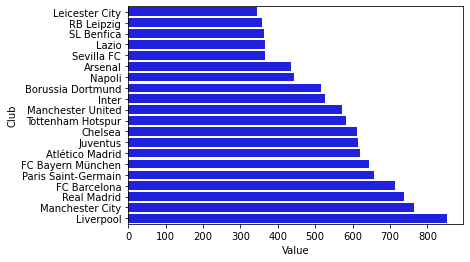

In [52]:
sns.set_color_codes("pastel")
sns.barplot(x="Value", y="Club", data=club_value_sum_sort[-20:],
            label="Value em €", color="blue")

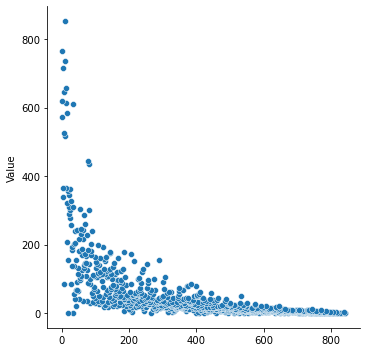

In [53]:
sns.relplot(data=club_value_sum_sort.Value)

Outra informação interessante é analisar qual jogador tem o maior salário. 

In [54]:
# Criamos um dataframe com as colunas 'Name' e 'Wage'.
wage_player = df.filter(['Name','Wage'])

In [55]:
# Ordenamos o valor dos salários.
wage_player_sort = wage_player.sort_values(by='Wage')

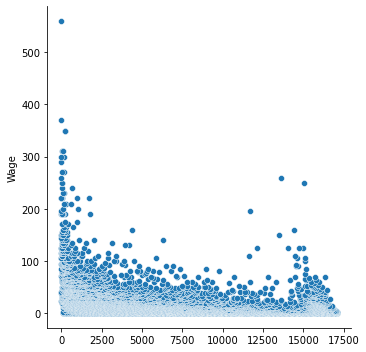

In [56]:
sns.relplot(data=wage_player_sort.Wage)

In [57]:
# Aqui vemos os 15 jogadores com maiores salários ordenados do menor para o maior.
wage_player_sort[:-15]

,Name,Wage
7314,20 P. Mahlambi,0.0
1131,E. Pavez,0.0
13612,09 Pedrinho,0.0
5209,11 G. Neville,0.0
13601,20 V. Popov,0.0
...,...,...
167,Bernardo Silva,230.0
146,Carvajal,230.0
44,R. Lewandowski,240.0
692,Sergio Busquets,240.0


<AxesSubplot:xlabel='Wage', ylabel='Name'>

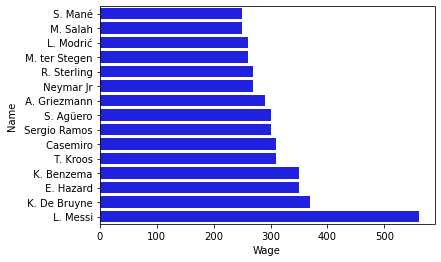

In [58]:
sns.set_color_codes("pastel")
sns.barplot(x="Wage", y="Name", data=wage_player_sort[-15:],
            label="Wage", color="blue")

Da mesma forma, podemos obter quais são os jogadores com os maiores valores em milhões de euros para quebra de contrato.

In [59]:
release_clause = df.filter(['Name', 'Release_Clause']) 

In [60]:
release_clause_sort = release_clause.sort_values(by='Release_Clause') 

In [61]:
# Aqui vemos os 15 jogadores com maior valor de quebra de contrato, ordenado do menor para o maior. 
release_clause_sort[:-15]

,Name,Release_Clause
3921,T. Zwane,0.0
12227,B. Babati,0.0
4344,16 M. Cáceres,0.0
4350,16 J. Cazares,0.0
15515,R. Cundy,0.0
...,...,...
225,E. Hazard,118.9
15047,T. Courtois,119.0
438,K. Havertz,119.7
14390,Alisson,120.3


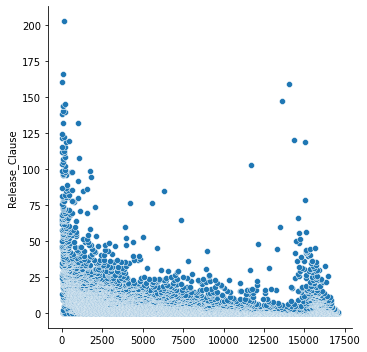

In [62]:
sns.relplot(data=release_clause_sort.Release_Clause)

<AxesSubplot:xlabel='Release_Clause', ylabel='Name'>

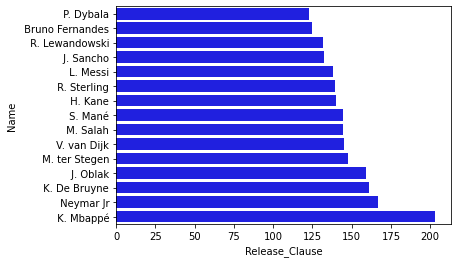

In [63]:
sns.set_color_codes("pastel")
sns.barplot(x="Release_Clause", y="Name", data=release_clause_sort[-15:],
            label="Release_Clause", color="blue")

Vamos agora checar o tempo de contrato, em dias, para determinado jogador.

In [64]:
# Aqui criamos uma nova coluna no nosso dataset que indica o tempo do contrato de cada jogador em dias.
df['Contract_days'] = df['Contract Valid Until'] - df['Joined']

In [65]:
# Criamos um novo dataframe com as colunas 'Club', 'Name' e 'Contract_days'.
contract = df.filter(['Name','Contract_days'])

In [66]:
# Colocamos os valores 'nan', quem não tem contrato para aparecer primeiro e ordenamos do menor para o maior.
# Aqui vemos os 15 jogadores com maior tempo de contrato no jogo.
contract_sort = contract.sort_values(by='Contract_days', na_position='first')

In [67]:
contract_sort[-15:]

,Name,Contract_days
8712,D. Lewington,6728 days
2798,14 J. Zanetti,6759 days
15720,19 V. Demirel,7088 days
391,13 P. Scholes,7117 days
16295,20 M. Wölfli,7123 days
6857,18 A. Berezutskiy,7124 days
3356,Y. Endo,7304 days
15570,I. Akinfeev,7305 days
5209,11 G. Neville,7305 days
14444,I. Khune,7489 days


In [68]:
corr = df.filter(['Value','Wage','Overall','Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Overall Rating', 'Release_Clause',
       'DefensiveAwareness', 'Contract_days',
       'Best Position'])

In [69]:
# corr = corr.T
# corr['Wage'] = df['Wage']
# corr['Value'] = df['Value']
# corr['Overall'] = df['Overall']
df.corr()['Best Overall Rating']

Age                         0.484567
Overall                     0.986721
Potential                   0.626040
Value                       0.637967
Wage                        0.589694
Special                     0.646180
International Reputation    0.453804
Weak Foot                   0.222431
Skill Moves                 0.381507
Jersey Number              -0.205928
Height                      0.021996
Weight                      0.141744
Crossing                    0.409397
Finishing                   0.343065
HeadingAccuracy             0.346294
ShortPassing                0.542406
Volleys                     0.395529
Dribbling                   0.394398
Curve                       0.430147
FKAccuracy                  0.398323
LongPassing                 0.523860
BallControl                 0.479977
Acceleration                0.186870
SprintSpeed                 0.197921
Agility                     0.268370
Reactions                   0.875692
Balance                     0.132032
S

In [70]:
chelsea_info = df[df['Club']=='Chelsea']

In [71]:
faturamento_chelsea = np.sum(chelsea_info['Value'])
print(f'A soma dos valores dos jogadores do Chelsea é de {faturamento_chelsea} milhões de euros. ')

A soma dos valores dos jogadores do Chelsea é de 611.285 milhões de euros. 


<AxesSubplot:xlabel='Best Overall Rating', ylabel='Name'>

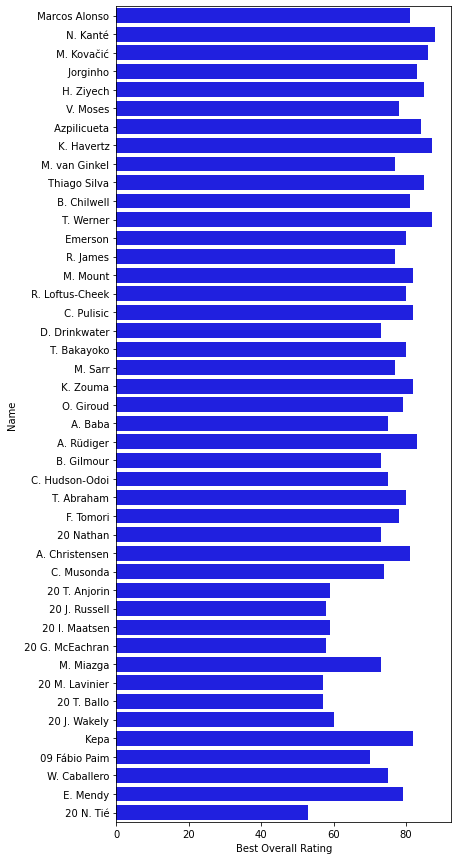

In [72]:
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="Best Overall Rating", y="Name", data=chelsea_info.filter(['Best Overall Rating','Name']),
            label="Best Overall Rating", color="blue")

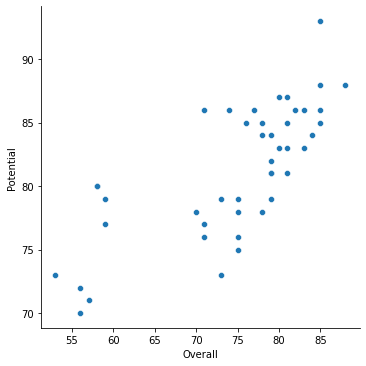

In [73]:
sns.relplot(x='Overall', y='Potential', data=chelsea_info.filter(['Name','Potential','Overall']))

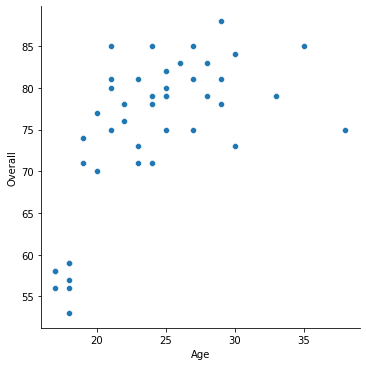

In [74]:
sns.relplot(x='Age', y='Overall', data=chelsea_info.filter(['Age','Overall']))

In [75]:
chelsea_info.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release_Clause',
       'DefensiveAwareness', 'Contract_days'],
      dtype='object')

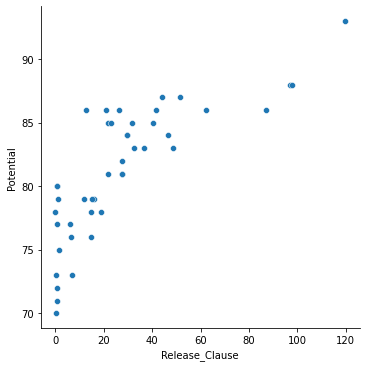

In [81]:
sns.relplot(x='Release_Clause', y='Potential', data=chelsea_info.filter(['Release_Clause','Potential']))